In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
plt.style.use("ggplot")

1.

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

2.

In [36]:
print(df.describe())
print("---")
print(df.isnull().sum())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [37]:
df_null = df.isnull()
row_nans = []
for i in range(df_null.shape[0]):
  for j in range(df_null.shape[1]):
    if df_null.iloc[i,j] == True:
      row_nans.append(i)

df_dropped = df.drop(df.index[row_nans])
df = df_dropped.reset_index(drop=True) # Resetting the index here
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


3.

In [38]:
print(np.unique(df["ocean_proximity"]))

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


4.

In [39]:
cols = ["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]
print(df.groupby(["ocean_proximity"])[cols].mean())

                 housing_median_age  total_rooms  total_bedrooms   population  \
ocean_proximity                                                                 
<1H OCEAN                 29.277397  2627.233451      546.539185  1518.440447   
INLAND                    24.262623  2721.252925      533.881619  1392.411484   
ISLAND                    42.400000  1574.600000      420.400000   668.000000   
NEAR BAY                  37.756388  2490.335242      514.182819  1227.881057   
NEAR OCEAN                29.314688  2587.165525      538.615677  1355.637367   

                 households  median_income  median_house_value  
ocean_proximity                                                 
<1H OCEAN        517.419083       4.231101       240267.990812  
INLAND           478.006927       3.210359       124896.863147  
ISLAND           276.600000       2.744420       380440.000000  
NEAR BAY         487.236123       4.175647       259279.292070  
NEAR OCEAN       501.528919       4.006374

5.



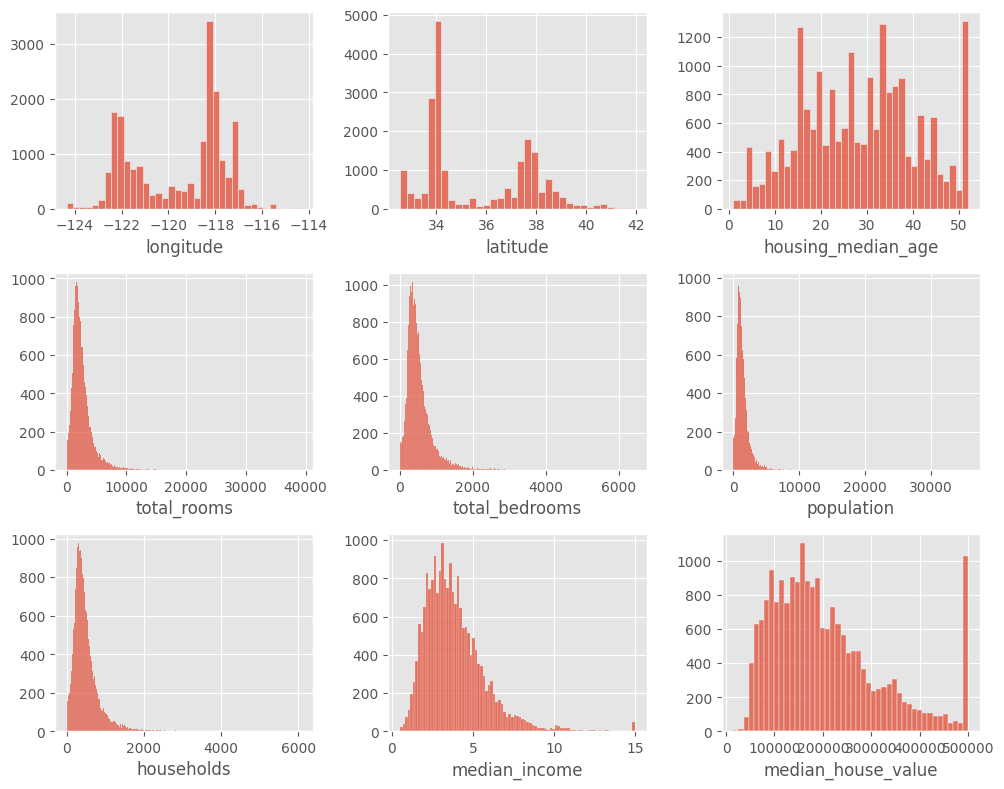

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
ax1 = sns.histplot(df["longitude"],ax=axes[0, 0])
ax2 = sns.histplot(df["latitude"],ax=axes[0, 1])
ax3 = sns.histplot(df["housing_median_age"],ax=axes[0, 2])
ax4 = sns.histplot(df["total_rooms"],ax=axes[1, 0])
ax5 = sns.histplot(df["total_bedrooms"],ax=axes[1, 1])
ax6 = sns.histplot(df["population"],ax=axes[1, 2])
ax7 = sns.histplot(df["households"],ax=axes[2, 0])
ax8 = sns.histplot(df["median_income"],ax=axes[2, 1])
ax9 = sns.histplot(df["median_house_value"],ax=axes[2, 2])
ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set(ylabel=None)
ax5.set(ylabel=None)
ax6.set(ylabel=None)
ax7.set(ylabel=None)
ax8.set(ylabel=None)
ax9.set(ylabel=None)
plt.tight_layout()
plt.show()

7.

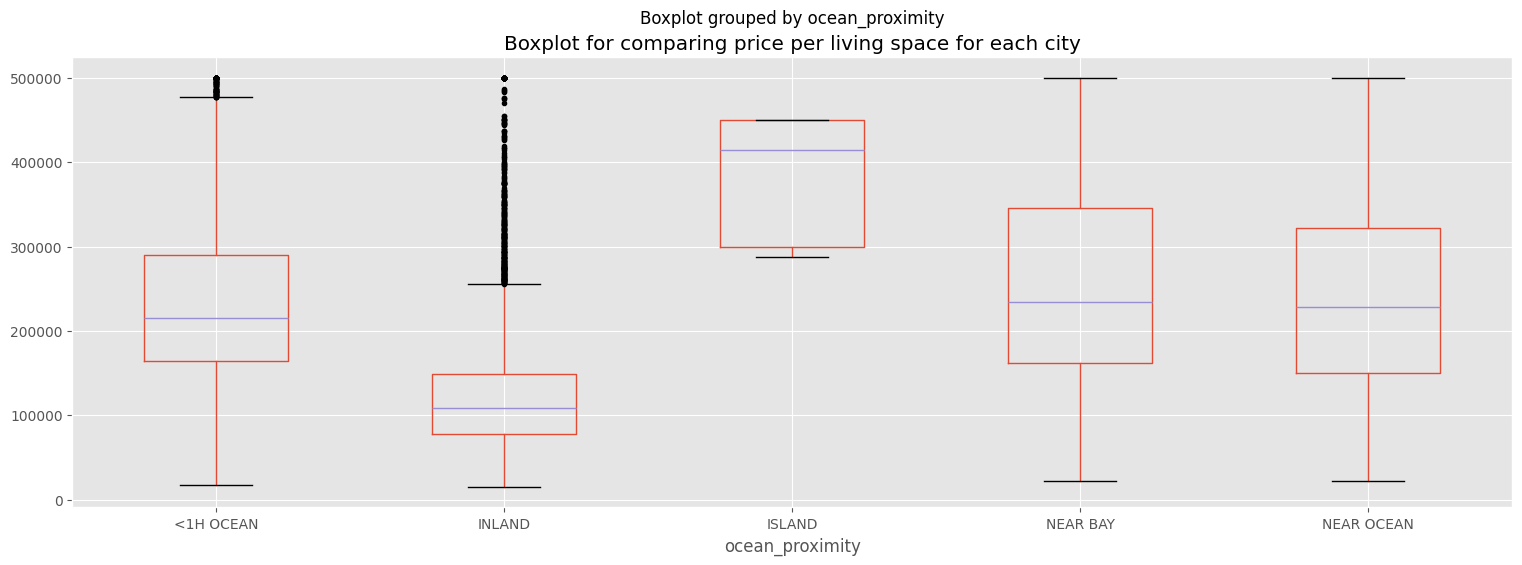

In [41]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8.

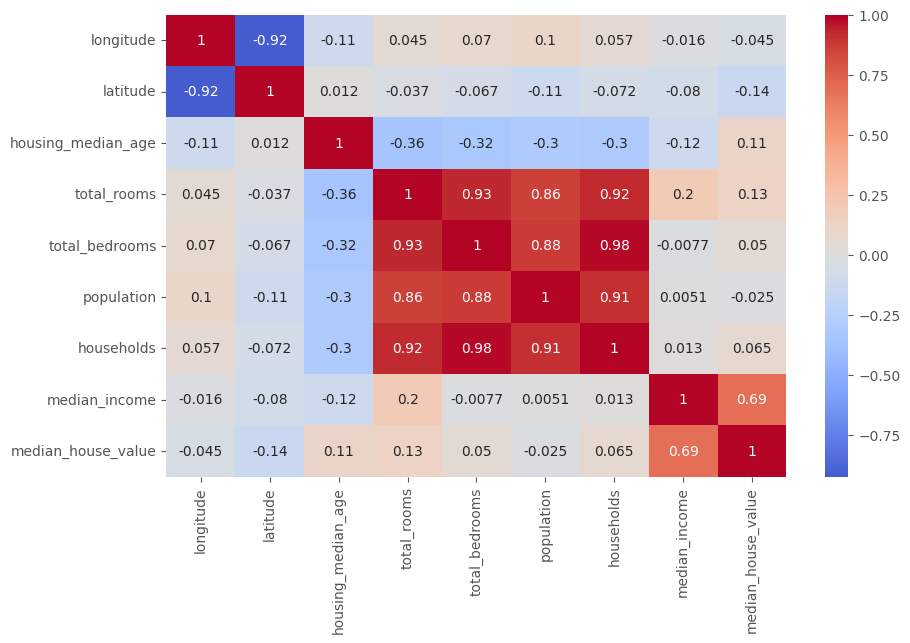

In [42]:
df_corr = df.drop("ocean_proximity",axis=1)
corr_matrix = df_corr.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9.

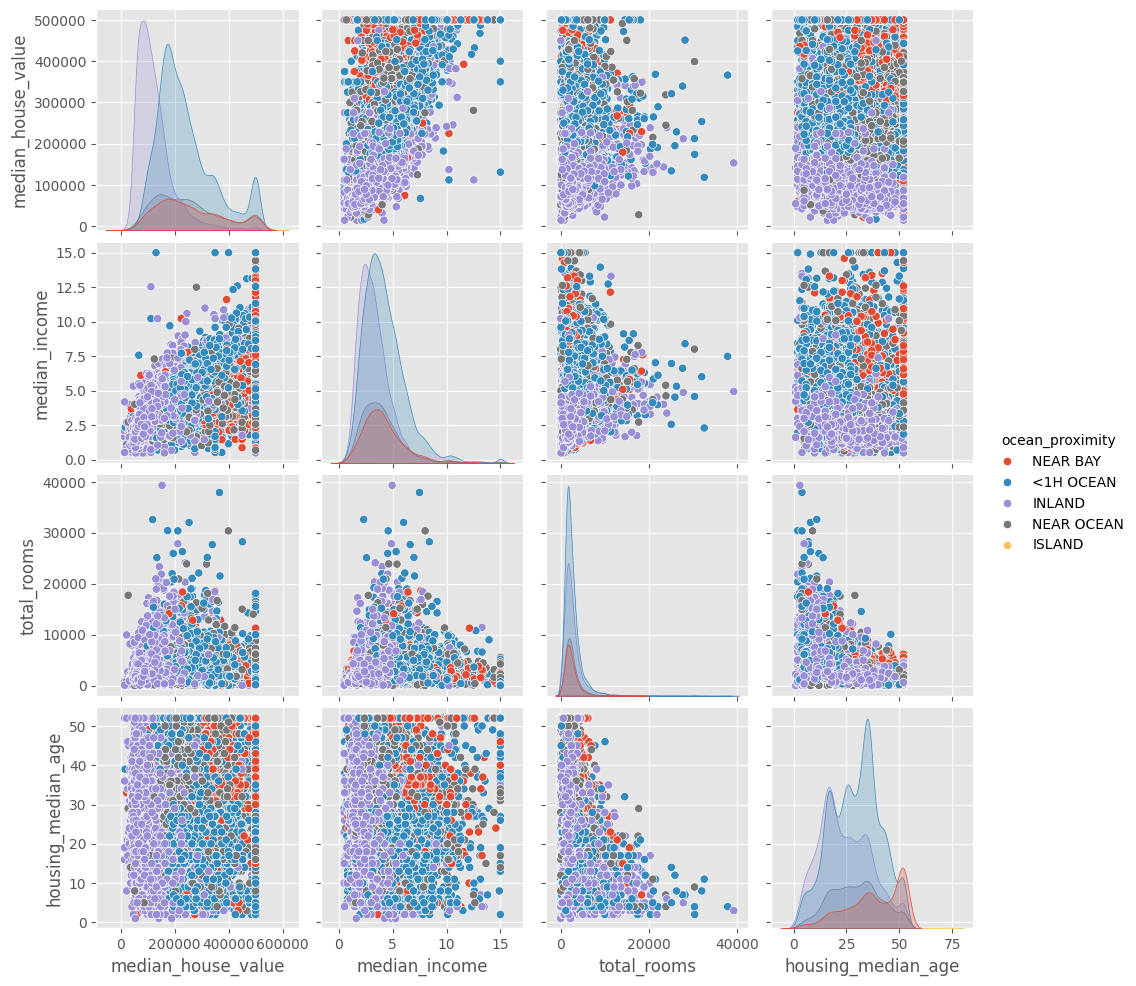

In [43]:
sns.pairplot(df[["median_house_value", "median_income", "total_rooms","housing_median_age", "ocean_proximity"]],hue="ocean_proximity")
plt.show()

10.

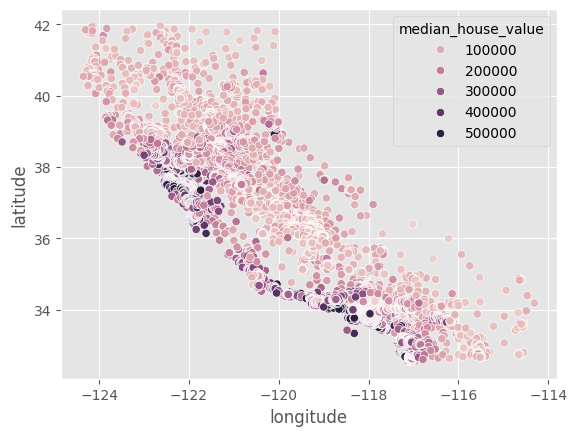

In [44]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value")
plt.show()

11.

In [45]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16346
4087


como 16346/20433 es 0.79..., aprox. el 80% de los datos se estarian utilizando para training, mientras que el 20% restante para el test. Considerando que el dataset es apreciablemente grande, esta separación podria considerarse efectiva.

12.

<Axes: >

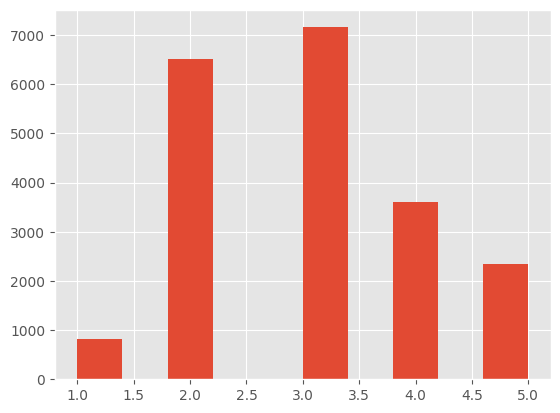

In [46]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df.income_cat.hist()

In [47]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
#n_splits: el proceso solo se realizara una vez
#test_size: 20% para el test
#random_state: seed

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [48]:
print(df["income_cat"].value_counts()/len(df))

#35.02% de los datos estan categorazidos con "3", 31.88% de los datos estan
#categorizados con "2", 17.67% de los datos con "4", 11.44% con "5" y
#3.98% con "1"

print("---")

print(strat_train_set["income_cat"].value_counts()/len(strat_train_set))

#Los porcentajes para el conjunto de datos separados para training son
#exactamente iguales para los datos originales (homogeneidad)

print("---")

print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))

#Los porcentajes para el conjunto de datos separados para test son
#exactamente iguales para los datos originales (homogeneidad)

print("---")

train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

print(train_set["income_cat"].value_counts()/len(train_set))

#Este es el método de separación usado en el punto 11, los porcentajes difieren un
#poco

income_cat
3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: count, dtype: float64
---
income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: count, dtype: float64
---
income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: count, dtype: float64
---
income_cat
3    0.352747
2    0.319161
4    0.175639
5    0.112138
1    0.040316
Name: count, dtype: float64


In [49]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

print(compare_props)

#El método con "Stratified" es claramente más eficiente al comparar los errores

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039838    0.039883  0.038904      2.343711       0.113051
2           0.318847    0.318816  0.317348      0.470218       0.009787
3           0.350218    0.350135  0.354783      1.303667       0.023760
4           0.176724    0.176658  0.173232      1.975809       0.037478
5           0.114374    0.114509  0.115733      1.188213       0.118570


13.

In [50]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_room"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_household"] = strat_train_set["population"]/strat_train_set["households"]

14.

In [51]:
df_train = strat_train_set

df_train_num = df_train.drop(["ocean_proximity","income_cat"], axis=1)
imp_mean = SimpleImputer(strategy='mean') #Para rellenar valores faltantes
imp_mean.fit(df_train_num)
print(imp_mean.statistics_)
print("---")
print(df_train_num.median())

[-1.19575240e+02  3.56390609e+01  2.86794935e+01  2.64349168e+03
  5.39510645e+02  1.42772911e+03  5.01013642e+02  3.87020800e+00
  2.07079816e+05  5.43394299e+00  2.12976050e-01  3.06517452e+00]
---
longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2131.000000
total_bedrooms                 435.000000
population                    1168.000000
households                     410.000000
median_income                    3.529900
median_house_value          179900.000000
rooms_per_household              5.226415
bedrooms_per_room                0.203339
population_per_household         2.814815
dtype: float64


La primera variable contiene los promedios de las columnas obtenidos a traves del imputer. La segunda variable imprime directamente la mediana de cada columna.

In [52]:
X = imp_mean.transform(df_train_num) #matriz con valores rellenados
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

15.

In [53]:
df_train["ocean_proximity"].unique() #Retorna los valores únicos distintos en la
#columna de categoría
housing_cat = df_train[["ocean_proximity"]] #Matriz de una columna que muestra
#cada fila del dataframe con su correspondiente categoría en column_proximity
print(housing_cat)

print("---")

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

#Se crea una matriz que "codifica" las categorías, con los unos de la matriz
#representando la categoría específica de cada fila

print("---")

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
#Convierte la matriz a dataframe
housing_tr_ = housing_tr.join(df_cat_1hot)
#Se combina el dataframe de los valores rellenados con el dataframe codificado
print(housing_tr_)

      ocean_proximity
17880       <1H OCEAN
17389       <1H OCEAN
19010       <1H OCEAN
17641       <1H OCEAN
10162       <1H OCEAN
...               ...
17250      NEAR OCEAN
2123           INLAND
7272        <1H OCEAN
11763          INLAND
9789         NEAR BAY

[16346 rows x 1 columns]
---
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
---
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -121.98     37.25                19.0        755.0            93.0   
1        -121.87     37.33                37.0       3137.0           685.0   
2        -122.68     38.44                36.0       1311.0           259.0   
3        -121.87     37.41                17.0       3719.0           588.0   
4        -117.85     33.90                25.0       1548.0           256.0   
...          ...       ..

16.

In [54]:
cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",
      "total_bedrooms", "population",   "households",   "median_income",
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]

housing_scale = housing_tr_[cols]
scaler = MinMaxScaler()
scaler.fit(housing_scale)
X = scaler.transform(housing_scale)
housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
print(housing_prepared)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.239879  0.500000            0.352941     0.019052        0.014277   
1       0.251012  0.508511            0.705882     0.079641        0.106145   
2       0.169028  0.626596            0.686275     0.033194        0.040037   
3       0.251012  0.517021            0.313725     0.094445        0.091092   
4       0.657895  0.143617            0.470588     0.039223        0.039572   
...          ...       ...                 ...          ...             ...   
16341   0.393725  0.223404            0.411765     0.032864        0.055400   
16342   0.467611  0.452128            0.450980     0.033321        0.038485   
16343   0.627530  0.150000            0.627451     0.037264        0.069832   
16344   0.704453  0.152128            0.705882     0.059292        0.069988   
16345   0.208502  0.611702            1.000000     0.023630        0.034606   

       population  households  median_income  <1H O

17.

In [55]:
def preparacion(df):
  df_ = df.copy()

  #Separación
  df_["income_cat"] = pd.cut(df_["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

  split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
  for train_index, test_index in split.split(df_, df_["income_cat"]):
   df_train = df_.loc[train_index]
   df_test = df_.loc[test_index]

  #Limpieza
  imp_mean1 = SimpleImputer(strategy='mean')
  imp_mean2 = SimpleImputer(strategy='mean')

  df_train_num = df_train.drop(["ocean_proximity","income_cat"], axis=1)
  imp_mean1.fit(df_train_num)
  X = imp_mean1.transform(df_train_num)
  df_train = pd.DataFrame(X, columns=df_train_num.columns)

  df_test_num = df_test.drop(["ocean_proximity","income_cat"], axis=1)
  imp_mean2.fit(df_test_num)
  X = imp_mean2.transform(df_test_num)
  df_test = pd.DataFrame(X, columns=df_test_num.columns)

  #Encodificación
  cat_encoder = OneHotEncoder(sparse_output=False)
  cat = df_[["ocean_proximity"]]

  cat_1hot = cat_encoder.fit_transform(cat)
  df_cat_1hot = pd.DataFrame(cat_1hot, columns = cat_encoder.categories_[0])
  df_train = df_train.join(df_cat_1hot)
  df_test = df_test.join(df_cat_1hot)

  #Escalamiento
  scale = df_train[df_train.columns]
  scaler = MinMaxScaler()
  scaler.fit(scale)
  X = scaler.transform(scale)
  df_train = pd.DataFrame(X, columns = scale.columns)

  scale = df_test[df_test.columns]
  scaler = MinMaxScaler()
  scaler.fit(scale)
  X = scaler.transform(scale)
  df_test = pd.DataFrame(X, columns = scale.columns)

  return df_train, df_test

In [56]:
housing_train = preparacion(pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"))[0]
housing_test = preparacion(pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"))[1]
print(housing_train)
print("---")
print(housing_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.287849  0.635494            0.549020     0.098362        0.128061   
1       0.709163  0.058448            0.117647     0.135168        0.137403   
2       0.528884  0.300744            0.843137     0.041003        0.049613   
3       0.719124  0.022317            0.450980     0.047591        0.083280   
4       0.562749  0.184910            0.509804     0.089790        0.103737   
...          ...       ...                 ...          ...             ...   
16507   0.725100  0.052072            0.254902     0.169380        0.197970   
16508   0.291833  0.634431            0.274510     0.200819        0.228737   
16509   0.162351  0.626993            0.921569     0.017831        0.026418   
16510   0.164343  0.613177            0.254902     0.080099        0.093106   
16511   0.220120  0.789586            0.509804     0.027293        0.035438   

       population  households  median_income  media

18. El modelo conlleva todos los aspectos necesarios para el tratamiento de los datos. Aunque es dificil de automatizar ya que cada dataframe contiene caracteristicas diferentes, como por ejemplo, las columnas que sean apropiadas para codificación o el imputer puedo no ser favorable para todos los datos dependiendo del contexto. Tambien es posible simplificarlo usando menos lineas de código.

19. Tal vez para las características que presenten más correlación, pero en conjunto, consideraria un proceso más complejo.

20. Los scores (0.63 y 0.57) muestran que la regresión lineal podría funcionar hasta un límite razonable pero no es óptima

In [57]:
X_train = housing_train.drop("median_house_value", axis=1)
y_train = housing_train["median_house_value"]

X_test = housing_test.drop("median_house_value", axis=1)
y_test = housing_test["median_house_value"]

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

print(train_score)
print(test_score)

0.634459125904692
0.5691826046575963


21. Como hay tantas características, tal vez sea mejor usar una regresion polinomial o un algoritmo como el Random Forest.

22. Podria automatizarse haciendo un pipeline para cada tipo de columna (numérica o categórica) acorde a los pasos de limpieza, encodificacíon y escalamiento:

```python
Pipeline([("imputer", SimpleImputer(strategy="median"))])
Pipeline([("scaler", StandardScaler())])
Pipeline([("encoder", OneHotEncoder())])